In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [7]:
%matplotlib notebook

In [8]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework

In [6]:
fname = r'/data/new_trap/20191104/Bead1/InitialTest/Data60.h5'
bdf = BeadDataFile.BeadDataFile(fname=fname)

No electrodes data
No cantilever data


In [87]:
foldername = r'/data/new_trap/20191204/Bead1/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

100  files in folder
100  files loaded


In [89]:
bb = bdf_discharge[0]
response_z = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]
response_x = [np.std(bb.response_at_freq('x',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


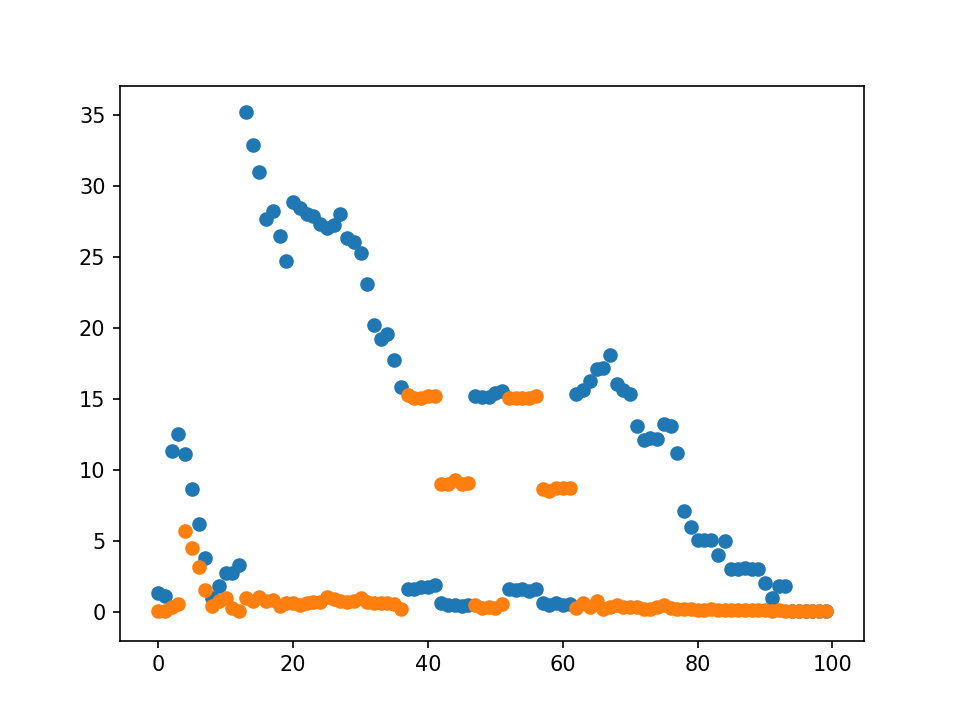

In [90]:
_,ax = plt.subplots()
ax.scatter(range(len(response_z)),response_z/response_z[47]/0.0636/3.1*3)
ax.scatter(range(len(response_z)),response_x/response_x[56]/0.0636/3.1*3)

In [91]:
bdf_x = bdf_discharge[52:57]
charges = 15

### Transfer function

In [92]:
fname = r'/data/new_trap/20191204/Bead1/TransFunc/TransFunc_X_4.h5'
fname2 = r'/data/new_trap/20191204/Bead1/TransFunc/TransFunc_X_4.h5'
bdf_tf_x = BeadDataFile.BeadDataFile(fname=fname)
bdf_tf_x2 = BeadDataFile.BeadDataFile(fname=fname2)

No cantilever data
Error loading spinning data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


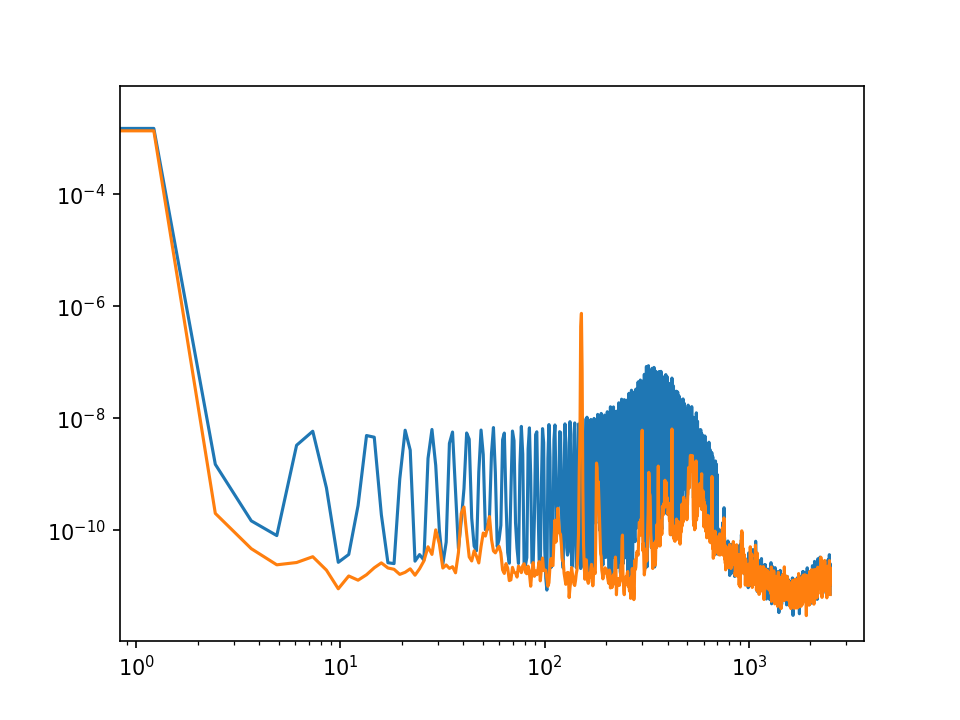

numbre of charges: 25.0257841542293


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [93]:
_,ax = plt.subplots()
ax.loglog(*bdf_tf_x.welch_psd('x'))
ax.loglog(*bdf_x[1].welch_psd('x'))
charges = np.std(bdf_tf_x.response_at_freq('x',drive_freq=147))/response_x[56]/0.0636/3.1*3*10/0.65
charges += np.std(bdf_tf_x.response_at_freq('x',drive_freq=154))/response_x[56]/0.0636/3.1*3*10/0.65
charges /= 2
print('numbre of charges:',charges)

In [99]:
print(np.std(bdf_tf_x.response_at_freq('x',drive_freq=259))/response_x[56]/0.0636/3.1*3*10/0.65/25)
print(np.std(bdf_tf_x.response_at_freq('x',drive_freq=21))/response_x[56]/0.0636/3.1*3*10/0.65/25)

1.7199121676394913
0.7994514937780823


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


### Gravity data

In [94]:
gfw = GravityFramework.GravityFramework()
foldername = r'/data/new_trap/20191204/Bead1/Shaking/Shaking370/'
datasets_num = 1000
gfw.BDFs = load_dir(foldername,file_prefix='Shaking1',max_file=datasets_num)

1000  files in folder
1000  files loaded


<IPython.core.display.Javascript object>


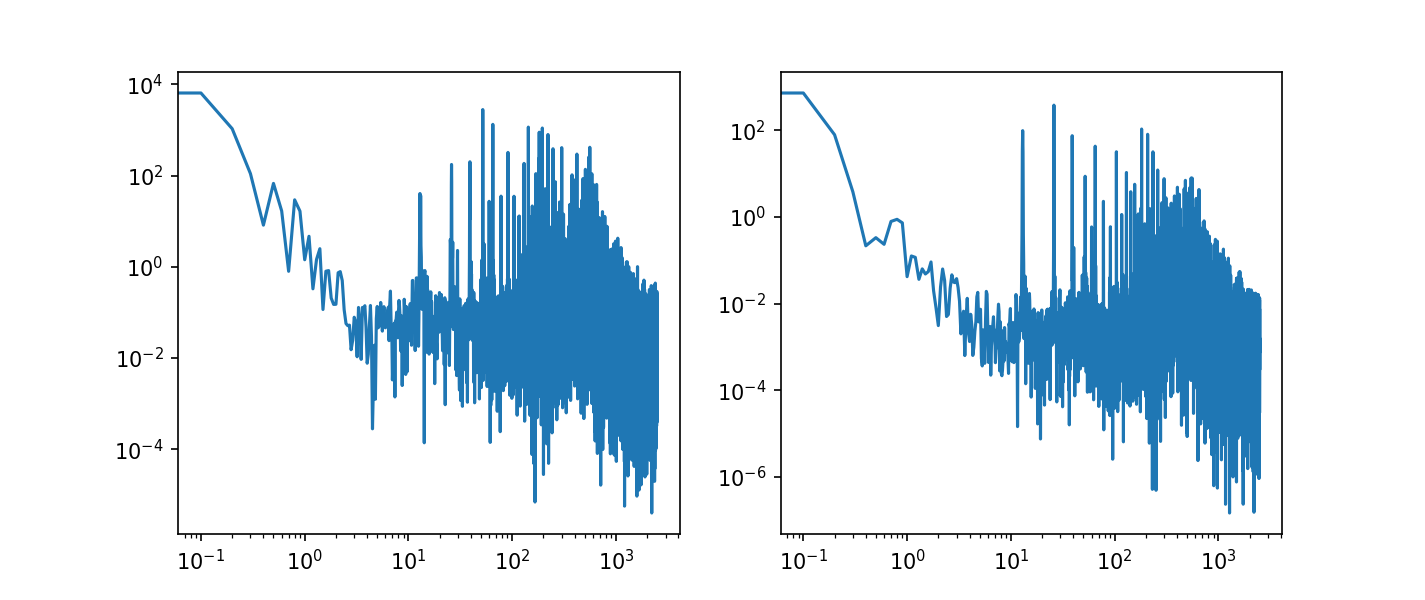

In [115]:
gfw.plot_dataset(bdf_i=13)

In [14]:
gfw.build_noise_array(sideband_freq=81)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.25300018202752367
x3 noise rms:  0.05353017164920328


In [15]:
m1s = gfw.build_x_response(bdf_x, drive_freq=151,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  8.357675355729913
***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  7.973775203336449
***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  8.482895486910035
***************************************************
X2-amplitude:  8.89e+01
reduced chi2:  8.090453486511798
***************************************************
X2-amplitude:  8.96e+01
reduced chi2:  8.22476709014919
X3 to X2 ratio: 0.18682062835025937
X2 response (amplitude): 88.73777942864784


<IPython.core.display.Javascript object>


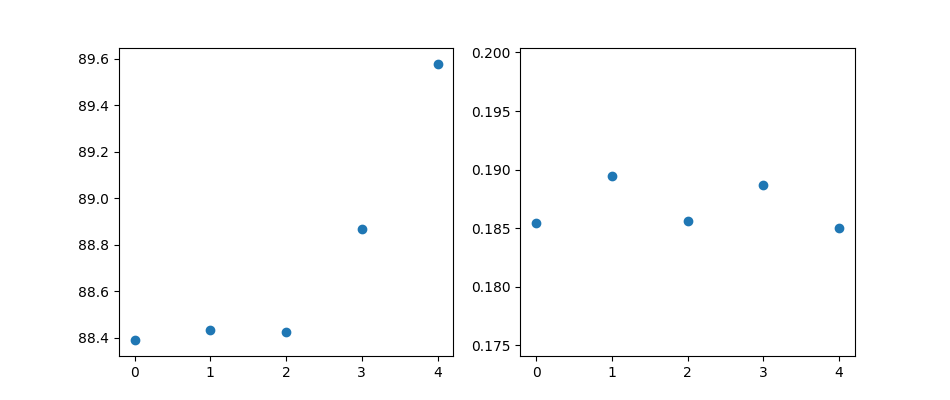

In [94]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(5), [m1.values[0] for m1 in m1s])
ax[1].scatter(range(5), [m1.values[1] for m1 in m1s])

In [17]:
drive_freq = 151
fit_kwargs = {'A': 10, 'f': drive_freq, 'phi': 0, 'A2': 2, 'f2': drive_freq,
              'delta_phi': 0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.1, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi], 'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True,
              'fix_A2': False}
    
tmp_amp = gfw.get_amplitude(bdf=bdf_x[0], noise_rms=1, noise_rms2=1, **fit_kwargs)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  8.82e+01
reduced chi2:  24.851994222309134


In [18]:
tmp_amp[0]/gfw.scale_X2, 15*1.6e-19*20/8e-3*0.61

(6.068259547436134e-15, 3.6599999999999995e-15)

<IPython.core.display.Javascript object>


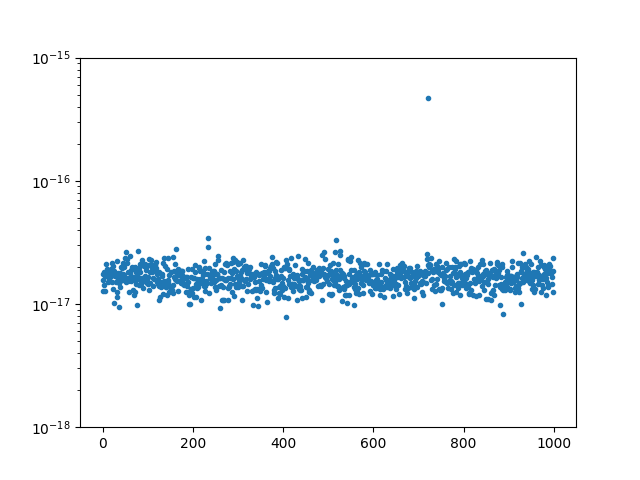

[(1e-18, 1e-15)]

In [57]:
_,ax = plt.subplots()
ax.semilogy(range(len(gfw.noise_list_x2)),gfw.noise_list_x2/gfw.scale_X2,'.')
ax.set(ylim=(1e-18,1e-15))

In [118]:
freq=13
gfw.build_noise_array(sideband_freq=freq*18)
tmp_amp20, m1s_20 = gfw.build_harmonics_array(freq=freq*20)
# gfw.build_noise_array(sideband_freq=freq*4)
# tmp_amp5, m1s_5 = gfw.build_harmonics_array(freq=freq*5)
# gfw.build_noise_array(sideband_freq=freq*12)
# tmp_amp6, m1s_6 = gfw.build_harmonics_array(freq=freq*6)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.250231088801046
x3 noise rms:  1.3307838493447106
0 / 1000
***************************************************
X2-amplitude:  4.58e+00
reduced chi2:  0.31445572423654283
1 / 1000
***************************************************
X2-amplitude:  3.83e+00
reduced chi2:  0.3165174433631403
2 / 1000
***************************************************
X2-amplitude:  2.17e+00
reduced chi2:  0.3801512356097385
3 / 1000
***************************************************
X2-amplitude:  3.14e+00
reduced chi2:  0.29310773625631314
4 / 1000
***************************************************
X2-amplitude:  1.75e+00
reduced chi2:  0.30008160357831665
5 / 1000
***************************************************
X2-amplitude:  8.91e-01
reduced chi2:  0.6810572028171853
6 / 1000
***************************************************
X2-amplitude:  7.32e+00
reduced chi2:  0.42280842289146203
7 / 1000
***************************************************
X2-amplitude:  6.52e+00
reduced chi

***************************************************
X2-amplitude:  1.80e+00
reduced chi2:  0.2397236680784813
69 / 1000
***************************************************
X2-amplitude:  2.62e+00
reduced chi2:  0.4174589791619069
70 / 1000
***************************************************
X2-amplitude:  1.58e+00
reduced chi2:  0.3388898739663357
71 / 1000
***************************************************
X2-amplitude:  1.09e+00
reduced chi2:  0.30623791550567986
72 / 1000
***************************************************
X2-amplitude:  1.54e+00
reduced chi2:  0.48028471309364223
73 / 1000
***************************************************
X2-amplitude:  2.35e+00
reduced chi2:  0.6833245297926455
74 / 1000
***************************************************
X2-amplitude:  3.67e+00
reduced chi2:  0.7799507088281263
75 / 1000
***************************************************
X2-amplitude:  4.32e+00
reduced chi2:  0.7957168020936148
76 / 1000
**************************************

***************************************************
X2-amplitude:  2.55e+00
reduced chi2:  0.611362791960997
137 / 1000
***************************************************
X2-amplitude:  1.42e+00
reduced chi2:  0.37018384142821953
138 / 1000
***************************************************
X2-amplitude:  7.57e-01
reduced chi2:  0.363510350140558
139 / 1000
***************************************************
X2-amplitude:  8.00e-01
reduced chi2:  0.35225320803892
140 / 1000
***************************************************
X2-amplitude:  1.28e+00
reduced chi2:  0.36440605447731916
141 / 1000
***************************************************
X2-amplitude:  1.69e+00
reduced chi2:  0.5607804005255068
142 / 1000
***************************************************
X2-amplitude:  1.54e+00
reduced chi2:  0.43770261855471715
143 / 1000
***************************************************
X2-amplitude:  2.06e+00
reduced chi2:  0.20020361088317096
144 / 1000
********************************

***************************************************
X2-amplitude:  1.42e+00
reduced chi2:  0.6655223342552621
205 / 1000
***************************************************
X2-amplitude:  2.52e+00
reduced chi2:  0.24924186208562116
206 / 1000
***************************************************
X2-amplitude:  1.33e+00
reduced chi2:  0.3562177946653994
207 / 1000
***************************************************
X2-amplitude:  1.61e+00
reduced chi2:  0.35428526672895255
208 / 1000
***************************************************
X2-amplitude:  2.01e+00
reduced chi2:  0.304610969442462
209 / 1000
***************************************************
X2-amplitude:  1.46e+00
reduced chi2:  0.34815569403282126
210 / 1000
***************************************************
X2-amplitude:  2.31e+00
reduced chi2:  0.4028796343442834
211 / 1000
***************************************************
X2-amplitude:  2.42e+00
reduced chi2:  0.3601755581194014
212 / 1000
******************************

***************************************************
X2-amplitude:  3.23e+00
reduced chi2:  0.0729061854357122
273 / 1000
***************************************************
X2-amplitude:  1.86e+00
reduced chi2:  0.11027126513477525
274 / 1000
***************************************************
X2-amplitude:  1.65e+00
reduced chi2:  0.11600893156618658
275 / 1000
***************************************************
X2-amplitude:  1.53e+00
reduced chi2:  0.08117073279760413
276 / 1000
***************************************************
X2-amplitude:  2.73e+00
reduced chi2:  0.05747612448661205
277 / 1000
***************************************************
X2-amplitude:  3.15e+00
reduced chi2:  0.06294112178728836
278 / 1000
***************************************************
X2-amplitude:  3.18e+00
reduced chi2:  0.07293250035028655
279 / 1000
***************************************************
X2-amplitude:  3.41e+00
reduced chi2:  0.051484229710686065
280 / 1000
************************

***************************************************
X2-amplitude:  1.45e+00
reduced chi2:  0.42489640096529
341 / 1000
***************************************************
X2-amplitude:  4.88e+00
reduced chi2:  0.09107282439921353
342 / 1000
***************************************************
X2-amplitude:  5.55e+00
reduced chi2:  0.06965579837435766
343 / 1000
***************************************************
X2-amplitude:  2.50e+00
reduced chi2:  0.047812096819073564
344 / 1000
***************************************************
X2-amplitude:  2.31e+00
reduced chi2:  0.7739745770155239
345 / 1000
***************************************************
X2-amplitude:  5.22e+00
reduced chi2:  1.0422030455992366
346 / 1000
***************************************************
X2-amplitude:  5.25e+00
reduced chi2:  1.1856562280941683
347 / 1000
***************************************************
X2-amplitude:  4.96e+00
reduced chi2:  0.8369886619272808
348 / 1000
******************************

***************************************************
X2-amplitude:  1.87e+00
reduced chi2:  0.43190075322612353
409 / 1000
***************************************************
X2-amplitude:  1.46e+00
reduced chi2:  0.1780133594062896
410 / 1000
***************************************************
X2-amplitude:  1.35e+00
reduced chi2:  0.19676962128657477
411 / 1000
***************************************************
X2-amplitude:  1.81e+00
reduced chi2:  0.3056786422731821
412 / 1000
***************************************************
X2-amplitude:  9.94e-01
reduced chi2:  0.17624313027773236
413 / 1000
***************************************************
X2-amplitude:  3.74e+00
reduced chi2:  0.29451897159265567
414 / 1000
***************************************************
X2-amplitude:  4.44e+00
reduced chi2:  0.0925178518215158
415 / 1000
***************************************************
X2-amplitude:  3.59e+00
reduced chi2:  0.2774127452006287
416 / 1000
****************************

***************************************************
X2-amplitude:  6.40e-01
reduced chi2:  0.1459041383932738
477 / 1000
***************************************************
X2-amplitude:  8.81e-01
reduced chi2:  0.2611466010625962
478 / 1000
***************************************************
X2-amplitude:  8.89e-01
reduced chi2:  0.16480505531838902
479 / 1000
***************************************************
X2-amplitude:  2.29e+00
reduced chi2:  0.08370432579132364
480 / 1000
***************************************************
X2-amplitude:  1.82e+00
reduced chi2:  0.1086705108042627
481 / 1000
***************************************************
X2-amplitude:  3.80e+00
reduced chi2:  0.041711674335959716
482 / 1000
***************************************************
X2-amplitude:  3.62e+00
reduced chi2:  0.040468234718869116
483 / 1000
***************************************************
X2-amplitude:  3.20e+00
reduced chi2:  0.04742418936022734
484 / 1000
*************************

***************************************************
X2-amplitude:  1.88e+00
reduced chi2:  0.09333098305842369
545 / 1000
***************************************************
X2-amplitude:  3.16e+00
reduced chi2:  0.027839361992986412
546 / 1000
***************************************************
X2-amplitude:  2.77e+00
reduced chi2:  0.026519323414035727
547 / 1000
***************************************************
X2-amplitude:  1.84e+00
reduced chi2:  0.23160326638334897
548 / 1000
***************************************************
X2-amplitude:  2.60e+00
reduced chi2:  0.06311637199891044
549 / 1000
***************************************************
X2-amplitude:  2.21e+00
reduced chi2:  0.13971609113878444
550 / 1000
***************************************************
X2-amplitude:  1.90e+00
reduced chi2:  0.2852220953543668
551 / 1000
***************************************************
X2-amplitude:  2.00e+00
reduced chi2:  0.3478923433332196
552 / 1000
************************

***************************************************
X2-amplitude:  2.55e+00
reduced chi2:  0.08146995568333625
613 / 1000
***************************************************
X2-amplitude:  2.64e+00
reduced chi2:  0.06984845706319959
614 / 1000
***************************************************
X2-amplitude:  2.39e+00
reduced chi2:  0.23799364883985974
615 / 1000
***************************************************
X2-amplitude:  2.21e+00
reduced chi2:  0.16640916058754296
616 / 1000
***************************************************
X2-amplitude:  2.45e+00
reduced chi2:  0.17489893719480193
617 / 1000
***************************************************
X2-amplitude:  2.38e+00
reduced chi2:  0.5187806197944517
618 / 1000
***************************************************
X2-amplitude:  3.15e+00
reduced chi2:  0.6895425923523152
619 / 1000
***************************************************
X2-amplitude:  2.58e+00
reduced chi2:  0.4140665568429116
620 / 1000
***************************

***************************************************
X2-amplitude:  4.75e+00
reduced chi2:  0.13871705106719212
681 / 1000
***************************************************
X2-amplitude:  4.21e+00
reduced chi2:  0.43110149615695476
682 / 1000
***************************************************
X2-amplitude:  3.38e+00
reduced chi2:  0.2510454725049439
683 / 1000
***************************************************
X2-amplitude:  1.45e+00
reduced chi2:  0.4285891102396087
684 / 1000
***************************************************
X2-amplitude:  2.96e+00
reduced chi2:  0.3122627873121473
685 / 1000
***************************************************
X2-amplitude:  3.02e+00
reduced chi2:  0.5050926419788693
686 / 1000
***************************************************
X2-amplitude:  3.42e+00
reduced chi2:  0.5449923999790298
687 / 1000
***************************************************
X2-amplitude:  3.08e+00
reduced chi2:  0.5986472913203664
688 / 1000
******************************

***************************************************
X2-amplitude:  3.03e+00
reduced chi2:  0.09658185922438103
749 / 1000
***************************************************
X2-amplitude:  2.84e+00
reduced chi2:  0.13311580649105437
750 / 1000
***************************************************
X2-amplitude:  3.08e+00
reduced chi2:  0.09273717523516589
751 / 1000
***************************************************
X2-amplitude:  2.00e+00
reduced chi2:  0.09625478807766137
752 / 1000
***************************************************
X2-amplitude:  1.52e+00
reduced chi2:  0.36149054710931533
753 / 1000
***************************************************
X2-amplitude:  1.99e+00
reduced chi2:  0.18872593398345755
754 / 1000
***************************************************
X2-amplitude:  4.82e+00
reduced chi2:  0.12184900024753713
755 / 1000
***************************************************
X2-amplitude:  5.58e+00
reduced chi2:  0.022079192684244214
756 / 1000
***********************

***************************************************
X2-amplitude:  1.74e+00
reduced chi2:  0.17093805494410658
817 / 1000
***************************************************
X2-amplitude:  3.76e+00
reduced chi2:  0.08971372105370778
818 / 1000
***************************************************
X2-amplitude:  3.64e+00
reduced chi2:  0.05828646697235024
819 / 1000
***************************************************
X2-amplitude:  3.00e+00
reduced chi2:  0.15246902040390253
820 / 1000
***************************************************
X2-amplitude:  1.87e+00
reduced chi2:  0.28052418827659664
821 / 1000
***************************************************
X2-amplitude:  2.91e+00
reduced chi2:  0.09378803411129503
822 / 1000
***************************************************
X2-amplitude:  3.46e+00
reduced chi2:  0.15518197534104117
823 / 1000
***************************************************
X2-amplitude:  1.51e+00
reduced chi2:  0.10803489684479849
824 / 1000
************************

***************************************************
X2-amplitude:  6.03e-01
reduced chi2:  0.447655553147048
885 / 1000
***************************************************
X2-amplitude:  5.70e-01
reduced chi2:  0.33709754788422036
886 / 1000
***************************************************
X2-amplitude:  9.10e-01
reduced chi2:  0.22887956993408018
887 / 1000
***************************************************
X2-amplitude:  8.91e-01
reduced chi2:  0.3734190902739797
888 / 1000
***************************************************
X2-amplitude:  8.26e-01
reduced chi2:  0.4284017404539141
889 / 1000
***************************************************
X2-amplitude:  1.01e+00
reduced chi2:  0.4660299620290342
890 / 1000
***************************************************
X2-amplitude:  4.69e-01
reduced chi2:  0.3416669432416929
891 / 1000
***************************************************
X2-amplitude:  9.25e-01
reduced chi2:  0.2963380291925623
892 / 1000
*******************************

***************************************************
X2-amplitude:  1.10e+00
reduced chi2:  0.464764332751165
953 / 1000
***************************************************
X2-amplitude:  1.29e+00
reduced chi2:  0.2914447164385369
954 / 1000
***************************************************
X2-amplitude:  1.04e+00
reduced chi2:  0.15394907638016542
955 / 1000
***************************************************
X2-amplitude:  1.87e+00
reduced chi2:  0.2551463815160573
956 / 1000
***************************************************
X2-amplitude:  1.07e+00
reduced chi2:  0.7727201661006304
957 / 1000
***************************************************
X2-amplitude:  1.82e+00
reduced chi2:  0.6312563968540013
958 / 1000
***************************************************
X2-amplitude:  1.44e+00
reduced chi2:  0.6175763254467844
959 / 1000
***************************************************
X2-amplitude:  1.41e+00
reduced chi2:  0.6573814072931408
960 / 1000
********************************

In [87]:
freq=13
# gfw.build_noise_array(sideband_freq=freq*5)
# tmp_amp4, m1s_4 = gfw.build_harmonics_array(freq=freq*4)
gfw.build_noise_array(sideband_freq=freq*4)
tmp_amp5, m1s_5 = gfw.build_harmonics_array(freq=freq*5)
# gfw.build_noise_array(sideband_freq=freq*12)
# tmp_amp6, m1s_6 = gfw.build_harmonics_array(freq=freq*6)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  10.899811186624467
x3 noise rms:  2.1353276559635717
0 / 1000
***************************************************
X2-amplitude:  4.35e+00
reduced chi2:  2.628362591823028
1 / 1000
***************************************************
X2-amplitude:  5.24e+00
reduced chi2:  5.476100734503499
2 / 1000
***************************************************
X2-amplitude:  7.26e+00
reduced chi2:  15.380503440579187
3 / 1000
***************************************************
X2-amplitude:  1.93e+00
reduced chi2:  8.00591542812184
4 / 1000
***************************************************
X2-amplitude:  5.98e+00
reduced chi2:  3.336881441850779
5 / 1000
***************************************************
X2-amplitude:  6.30e+00
reduced chi2:  4.018737862639912
6 / 1000
***************************************************
X2-amplitude:  1.64e+01
reduced chi2:  0.5306573338943595
7 / 1000
***************************************************
X2-amplitude:  2.18e+01
reduced chi2:  1.019

***************************************************
X2-amplitude:  1.38e+01
reduced chi2:  0.9038039905468233
69 / 1000
***************************************************
X2-amplitude:  7.17e+00
reduced chi2:  1.7889834306181387
70 / 1000
***************************************************
X2-amplitude:  2.24e+00
reduced chi2:  1.6317660697271923
71 / 1000
***************************************************
X2-amplitude:  5.81e+00
reduced chi2:  0.4036371993503984
72 / 1000
***************************************************
X2-amplitude:  8.25e+00
reduced chi2:  0.1549996365873454
73 / 1000
***************************************************
X2-amplitude:  1.25e+01
reduced chi2:  0.16872368932656825
74 / 1000
***************************************************
X2-amplitude:  1.79e+01
reduced chi2:  0.45176698222164663
75 / 1000
***************************************************
X2-amplitude:  1.35e+01
reduced chi2:  0.6709004603011502
76 / 1000
**************************************

***************************************************
X2-amplitude:  3.07e+00
reduced chi2:  0.5479991555867785
137 / 1000
***************************************************
X2-amplitude:  1.65e+01
reduced chi2:  0.3858732729970572
138 / 1000
***************************************************
X2-amplitude:  2.04e+01
reduced chi2:  0.5465573003898426
139 / 1000
***************************************************
X2-amplitude:  2.25e+01
reduced chi2:  0.3639876897199265
140 / 1000
***************************************************
X2-amplitude:  2.02e+01
reduced chi2:  0.4978676860852471
141 / 1000
***************************************************
X2-amplitude:  4.09e+00
reduced chi2:  0.018080212321814525
142 / 1000
***************************************************
X2-amplitude:  3.31e+00
reduced chi2:  0.016714146570811564
143 / 1000
***************************************************
X2-amplitude:  1.12e+01
reduced chi2:  0.03112452453439208
144 / 1000
***************************

***************************************************
X2-amplitude:  2.81e+01
reduced chi2:  0.6017108915632718
205 / 1000
***************************************************
X2-amplitude:  9.11e+00
reduced chi2:  0.1864377613893013
206 / 1000
***************************************************
X2-amplitude:  1.69e+01
reduced chi2:  0.05394854112190171
207 / 1000
***************************************************
X2-amplitude:  1.68e+01
reduced chi2:  0.037858102487270694
208 / 1000
***************************************************
X2-amplitude:  3.21e+00
reduced chi2:  2.073125043724493
209 / 1000
***************************************************
X2-amplitude:  4.24e+00
reduced chi2:  1.1261757479865404
210 / 1000
***************************************************
X2-amplitude:  1.39e+01
reduced chi2:  0.6172749741595717
211 / 1000
***************************************************
X2-amplitude:  1.82e+01
reduced chi2:  0.028426612634868648
212 / 1000
****************************

***************************************************
X2-amplitude:  9.60e-01
reduced chi2:  0.45315172760618894
273 / 1000
***************************************************
X2-amplitude:  1.36e+01
reduced chi2:  0.5373829696127611
274 / 1000
***************************************************
X2-amplitude:  1.47e+01
reduced chi2:  0.5464405080580078
275 / 1000
***************************************************
X2-amplitude:  1.96e+01
reduced chi2:  0.6332726468009877
276 / 1000
***************************************************
X2-amplitude:  4.84e+00
reduced chi2:  0.7714658379524147
277 / 1000
***************************************************
X2-amplitude:  1.19e+00
reduced chi2:  0.5104925371796387
278 / 1000
***************************************************
X2-amplitude:  2.37e+00
reduced chi2:  0.4950778046752123
279 / 1000
***************************************************
X2-amplitude:  4.17e+00
reduced chi2:  0.397826813218195
280 / 1000
********************************

***************************************************
X2-amplitude:  2.47e+00
reduced chi2:  1.155495080555173
341 / 1000
***************************************************
X2-amplitude:  1.99e+01
reduced chi2:  1.1867976563465599
342 / 1000
***************************************************
X2-amplitude:  2.19e+01
reduced chi2:  0.8682159391107311
343 / 1000
***************************************************
X2-amplitude:  1.68e+01
reduced chi2:  3.4090129477403575
344 / 1000
***************************************************
X2-amplitude:  8.66e+00
reduced chi2:  0.42563738561584535
345 / 1000
***************************************************
X2-amplitude:  2.83e+00
reduced chi2:  0.5045865350080875
346 / 1000
***************************************************
X2-amplitude:  2.86e+00
reduced chi2:  0.3485159603011869
347 / 1000
***************************************************
X2-amplitude:  3.07e+00
reduced chi2:  0.5185015878292132
348 / 1000
********************************

***************************************************
X2-amplitude:  1.65e+01
reduced chi2:  2.9156309760443353
409 / 1000
***************************************************
X2-amplitude:  4.14e+00
reduced chi2:  0.8893758231265082
410 / 1000
***************************************************
X2-amplitude:  2.09e+00
reduced chi2:  0.3229349037362634
411 / 1000
***************************************************
X2-amplitude:  8.02e+00
reduced chi2:  9.852802491719244
412 / 1000
***************************************************
X2-amplitude:  1.71e+00
reduced chi2:  0.512672515582653
413 / 1000
***************************************************
X2-amplitude:  1.36e+01
reduced chi2:  0.15400424518009406
414 / 1000
***************************************************
X2-amplitude:  2.64e+01
reduced chi2:  0.2953574404714537
415 / 1000
***************************************************
X2-amplitude:  2.74e+01
reduced chi2:  0.46112415225828346
416 / 1000
********************************

***************************************************
X2-amplitude:  2.71e+01
reduced chi2:  0.09063971296681879
477 / 1000
***************************************************
X2-amplitude:  1.49e+01
reduced chi2:  0.2002960883685808
478 / 1000
***************************************************
X2-amplitude:  6.50e+00
reduced chi2:  0.2296713361116455
479 / 1000
***************************************************
X2-amplitude:  5.17e+00
reduced chi2:  0.7598618488216454
480 / 1000
***************************************************
X2-amplitude:  1.70e+00
reduced chi2:  0.09477817322696688
481 / 1000
***************************************************
X2-amplitude:  1.27e+01
reduced chi2:  2.206248769659701
482 / 1000
***************************************************
X2-amplitude:  2.25e+01
reduced chi2:  0.3971893438136182
483 / 1000
***************************************************
X2-amplitude:  2.26e+01
reduced chi2:  0.2507456450450787
484 / 1000
*******************************

***************************************************
X2-amplitude:  2.27e+01
reduced chi2:  1.6199183223858091
545 / 1000
***************************************************
X2-amplitude:  1.89e+01
reduced chi2:  1.4806199646760239
546 / 1000
***************************************************
X2-amplitude:  1.75e+01
reduced chi2:  1.5913669432107989
547 / 1000
***************************************************
X2-amplitude:  3.45e+00
reduced chi2:  1.6792513313841397
548 / 1000
***************************************************
X2-amplitude:  1.78e+01
reduced chi2:  1.8889615380823388
549 / 1000
***************************************************
X2-amplitude:  1.86e+01
reduced chi2:  2.0975467379304242
550 / 1000
***************************************************
X2-amplitude:  2.06e+01
reduced chi2:  1.7281875972511678
551 / 1000
***************************************************
X2-amplitude:  1.86e+01
reduced chi2:  2.149724895752534
552 / 1000
*********************************

***************************************************
X2-amplitude:  1.31e+01
reduced chi2:  1.4250668581936725
613 / 1000
***************************************************
X2-amplitude:  1.37e+01
reduced chi2:  0.9656788286398236
614 / 1000
***************************************************
X2-amplitude:  1.44e+01
reduced chi2:  0.5434765571331657
615 / 1000
***************************************************
X2-amplitude:  1.68e+01
reduced chi2:  1.7559224207254243
616 / 1000
***************************************************
X2-amplitude:  1.38e+01
reduced chi2:  0.6879298126427276
617 / 1000
***************************************************
X2-amplitude:  1.35e+01
reduced chi2:  0.3511097512633533
618 / 1000
***************************************************
X2-amplitude:  1.47e+01
reduced chi2:  0.5198793497472303
619 / 1000
***************************************************
X2-amplitude:  1.42e+01
reduced chi2:  1.3490044816607092
620 / 1000
********************************

***************************************************
X2-amplitude:  1.90e+01
reduced chi2:  0.36865031915337315
681 / 1000
***************************************************
X2-amplitude:  2.49e+01
reduced chi2:  0.928830857994848
682 / 1000
***************************************************
X2-amplitude:  2.14e+01
reduced chi2:  0.5266539469412527
683 / 1000
***************************************************
X2-amplitude:  1.86e+01
reduced chi2:  1.592164651924535
684 / 1000
***************************************************
X2-amplitude:  6.62e+00
reduced chi2:  0.7446192730135327
685 / 1000
***************************************************
X2-amplitude:  7.20e+00
reduced chi2:  1.2194584457078572
686 / 1000
***************************************************
X2-amplitude:  5.97e+00
reduced chi2:  1.1719841396062542
687 / 1000
***************************************************
X2-amplitude:  7.29e+00
reduced chi2:  0.19457554995766752
688 / 1000
********************************

***************************************************
X2-amplitude:  1.06e+01
reduced chi2:  0.6621751365637922
749 / 1000
***************************************************
X2-amplitude:  1.17e+01
reduced chi2:  0.7421497898034701
750 / 1000
***************************************************
X2-amplitude:  9.90e+00
reduced chi2:  0.7410797237785486
751 / 1000
***************************************************
X2-amplitude:  1.45e+01
reduced chi2:  0.6934295376628633
752 / 1000
***************************************************
X2-amplitude:  1.02e+01
reduced chi2:  1.148144014715506
753 / 1000
***************************************************
X2-amplitude:  1.34e+01
reduced chi2:  0.589624473882926
754 / 1000
***************************************************
X2-amplitude:  2.10e+01
reduced chi2:  2.684030620161527
755 / 1000
***************************************************
X2-amplitude:  1.93e+01
reduced chi2:  0.39777986180719205
756 / 1000
**********************************

***************************************************
X2-amplitude:  1.01e+01
reduced chi2:  1.4135099132132791
817 / 1000
***************************************************
X2-amplitude:  1.01e+01
reduced chi2:  1.8495247886297554
818 / 1000
***************************************************
X2-amplitude:  8.57e+00
reduced chi2:  3.3560939390207625
819 / 1000
***************************************************
X2-amplitude:  3.61e+00
reduced chi2:  2.058645477057352
820 / 1000
***************************************************
X2-amplitude:  4.63e+00
reduced chi2:  1.3272386523345525
821 / 1000
***************************************************
X2-amplitude:  1.83e+01
reduced chi2:  1.4822734913544036
822 / 1000
***************************************************
X2-amplitude:  1.19e+01
reduced chi2:  3.6814942398455983
823 / 1000
***************************************************
X2-amplitude:  8.70e+00
reduced chi2:  1.2770381025030608
824 / 1000
*********************************

***************************************************
X2-amplitude:  1.34e+01
reduced chi2:  0.33392278414763055
885 / 1000
***************************************************
X2-amplitude:  2.13e+01
reduced chi2:  0.629025595662501
886 / 1000
***************************************************
X2-amplitude:  3.16e+01
reduced chi2:  2.272903234278221
887 / 1000
***************************************************
X2-amplitude:  2.42e+01
reduced chi2:  3.1750931409176935
888 / 1000
***************************************************
X2-amplitude:  1.99e+01
reduced chi2:  0.4121477781331076
889 / 1000
***************************************************
X2-amplitude:  1.97e+01
reduced chi2:  0.2472469921410527
890 / 1000
***************************************************
X2-amplitude:  2.57e+01
reduced chi2:  1.5626246034837221
891 / 1000
***************************************************
X2-amplitude:  3.27e+01
reduced chi2:  4.421157415338526
892 / 1000
**********************************

***************************************************
X2-amplitude:  2.16e+01
reduced chi2:  4.4628614758034795
953 / 1000
***************************************************
X2-amplitude:  1.48e+01
reduced chi2:  5.215345592295923
954 / 1000
***************************************************
X2-amplitude:  6.81e+00
reduced chi2:  7.550284164505164
955 / 1000
***************************************************
X2-amplitude:  1.91e+00
reduced chi2:  5.702282161910297
956 / 1000
***************************************************
X2-amplitude:  4.11e+00
reduced chi2:  4.056587168356897
957 / 1000
***************************************************
X2-amplitude:  7.64e+00
reduced chi2:  1.1528118372605414
958 / 1000
***************************************************
X2-amplitude:  8.76e+00
reduced chi2:  2.4536835469180573
959 / 1000
***************************************************
X2-amplitude:  2.58e+00
reduced chi2:  0.9179183238341724
960 / 1000
************************************

<IPython.core.display.Javascript object>


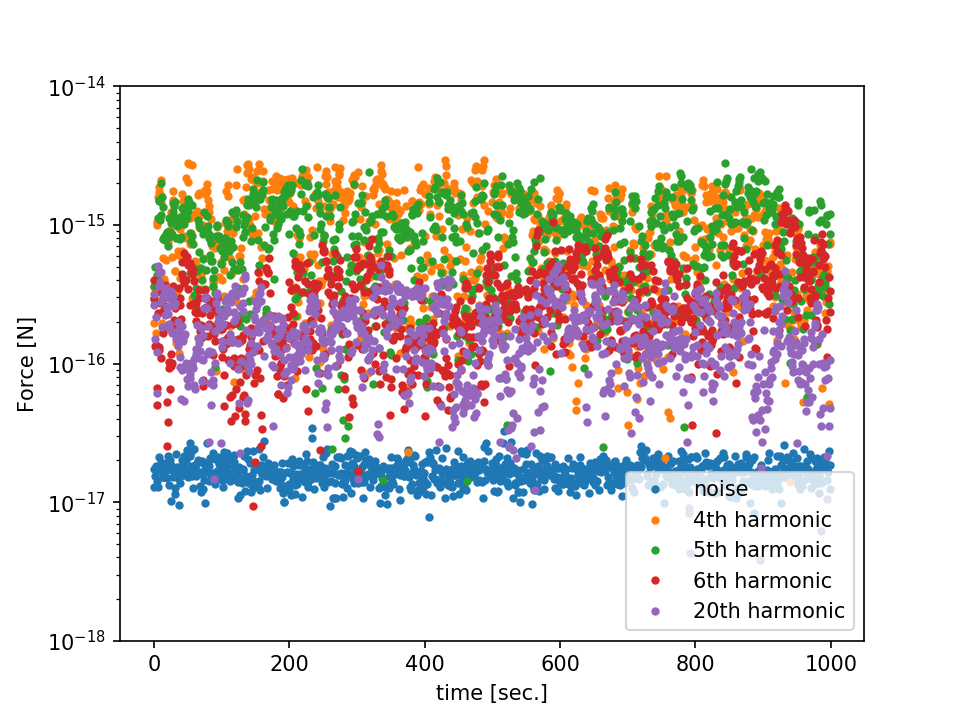

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.24839752705256743
x3 noise rms:  0.05255935038548794
4th harmonic, mean:  9.829346198400578e-16 std:  6.766142425950906e-16
5th harmonic, mean:  8.991857089690707e-16 std:  5.457126793561561e-16
6th harmonic, mean:  3.0037017637941757e-16 std:  2.032977903157618e-16
20th harmonic, mean:  1.7248987525032018e-16 std:  9.641541971445302e-17


In [119]:
_,ax = plt.subplots()
gfw.build_noise_array(sideband_freq=freq*5+3)
time = np.arange(datasets_num)
ax.semilogy(time,gfw.noise_list_x2/gfw.scale_X2,'.', label='noise')
ax.semilogy(time,(tmp_amp4/gfw.scale_X2),'.', label='4th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp5/gfw.scale_X2),'.', label='5th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp6/gfw.scale_X2),'.', label='6th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp20/gfw.scale_X2),'.', label='20th harmonic')
ax.set(ylim=(1e-18,1e-14),ylabel='Force [N]', xlabel='time [sec.]')
ax.legend()

print('4th harmonic, mean: ', np.mean(np.abs(tmp_amp4/gfw.scale_X2)), 'std: ', np.std((tmp_amp4/gfw.scale_X2)))
print('5th harmonic, mean: ', np.mean(np.abs(tmp_amp5/gfw.scale_X2)), 'std: ', np.std((tmp_amp5/gfw.scale_X2)))
print('6th harmonic, mean: ', np.mean(np.abs(tmp_amp6/gfw.scale_X2)), 'std: ', np.std((tmp_amp6/gfw.scale_X2)))
print('20th harmonic, mean: ', np.mean(np.abs(tmp_amp20/gfw.scale_X2)), 'std: ', np.std((tmp_amp20/gfw.scale_X2)))

<IPython.core.display.Javascript object>


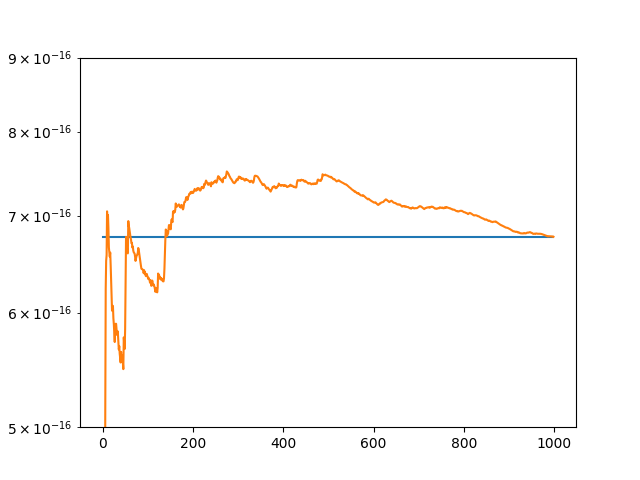

2.723564556275331e-16 4.7873110358786355e-17


In [61]:
tamp_amp4_sigma = [np.std(tmp_amp4) for i in range(1,1000)]
tamp_amp4_sigma2 = [np.std(tmp_amp4[:i]) for i in range(1,1000)]
_,ax = plt.subplots()
ax.semilogy(range(len(tamp_amp4_sigma)),tamp_amp4_sigma/gfw.scale_X2)
ax.semilogy(range(len(tamp_amp4_sigma2)),tamp_amp4_sigma2/gfw.scale_X2)
ax.set(ylim=(5e-16,9e-16))
print((np.mean(tmp_amp4[:500])-np.mean(tmp_amp4[500:]))/gfw.scale_X2, 11/np.sqrt(250)/gfw.scale_X2)

### Estimating uncertainties

In [29]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [120]:
# take N 'samples' from the larger population
N = 1000
samples = tmp_amp4[:N]/gfw.scale_X2
print('4th harmonic: ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp5[:N]/gfw.scale_X2
print('5th harmonic: ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp6[:N]/gfw.scale_X2
print('6th harmonic: ',bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp20[:N]/gfw.scale_X2
print('20th harmonic: ',bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))

4th harmonic:  9.827910800950382e-16    (9.409728332923795e-16, 1.0247418738913949e-15)
5th harmonic:  8.991327693342645e-16    (8.664465834521925e-16, 9.332093181920175e-16)
6th harmonic:  3.0057105919026256e-16    (2.8802247413395294e-16, 3.1333026236209933e-16)
20th harmonic:  1.7253088700978542e-16    (1.6651738433697148e-16, 1.7839772282188361e-16)


In [ ]:
m1_list = [m1s_4, m1s_5, m1s_6]
_,ax = plt.subplots()
# ax.scatter(range(datasets_num),[m1.values[0] for m1 in gfw.m1_list])
# ax.scatter(range(datasets_num),[m1.values[4] for m1 in gfw.m1_list])
# ax.scatter(range(datasets_num),[m1.values[4] for m1 in gfw.m1_list])
[ax.errorbar(range(datasets_num),[m1.values[0] for m1 in m1s], yerr=[m1.errors[0] for m1 in m1s], fmt='o') for m1s in m1_list]
# ax.scatter(range(datasets_num),[np.std(bb.cant_pos[1]) for bb in gfw.BDFs])

In [ ]:
_,ax = plt.subplots()
# ax.scatter([m1.values[4] for m1 in gfw.m1_list],[np.mean(bb.cant_pos[1]) for bb in gfw.BDFs])
ax.semilogy([m1.values[4] for m1 in gfw.m1_list],np.abs(gfw.Harmonics_array/gfw.scale_X2),'.')


In [116]:
bb = gfw.BDFs[600]
[print(np.mean(bb.cant_pos[i])*50, np.std(bb.cant_pos[i])*50*np.sqrt(2)*2) for i in range(3)]

366.9598874723163 0.08686643042279807
147.87625152494024 318.1040657424838
144.16285045292705 0.017890677157383423


[None, None, None]

<IPython.core.display.Javascript object>


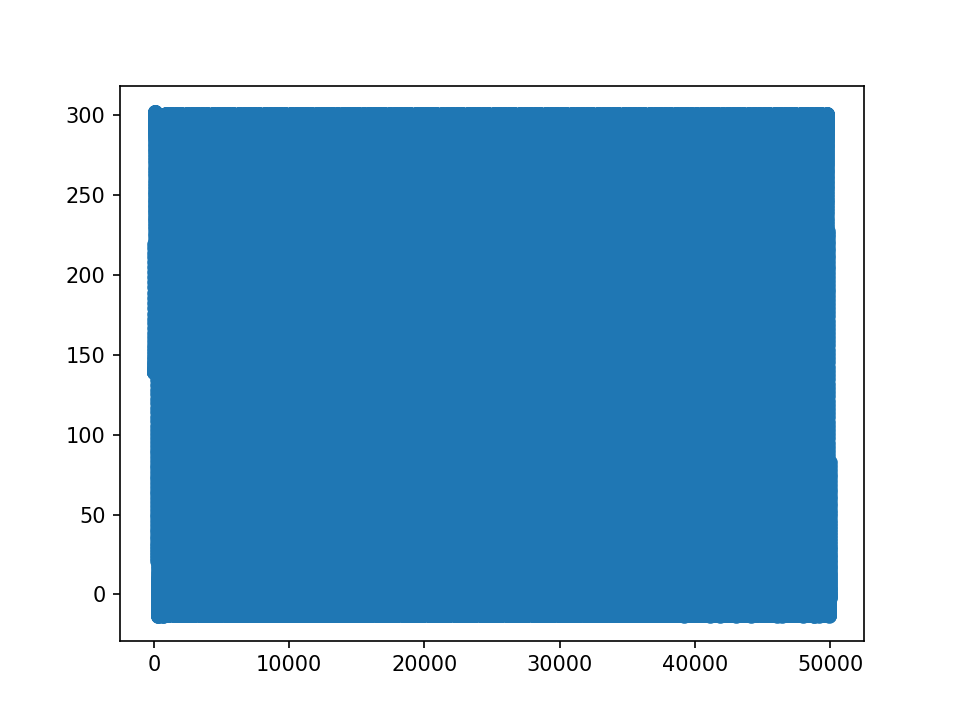

In [114]:
_,ax = plt.subplots()
ax.scatter(range(50000), bb.cant_pos[1]*50)

### Limit

In [11]:
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [44]:
test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=20e-6,yuk_or_grav="yuk",alpha=1e10)

bandwidth = 1
i=20
drive_freq = 13*i
fsamp = 5000
b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
responsefilt = np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10))

X0 = responsefilt
X=1.72e-16
Sigma = 4e-18
# Sigma = 9.6e-17
alpha_hat = X/X0
bla = Sigma/X0*3
alpha = np.arange(alpha_hat,alpha_hat+bla, 0.001)
PL = ((alpha*X0-X)/Sigma)**2

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


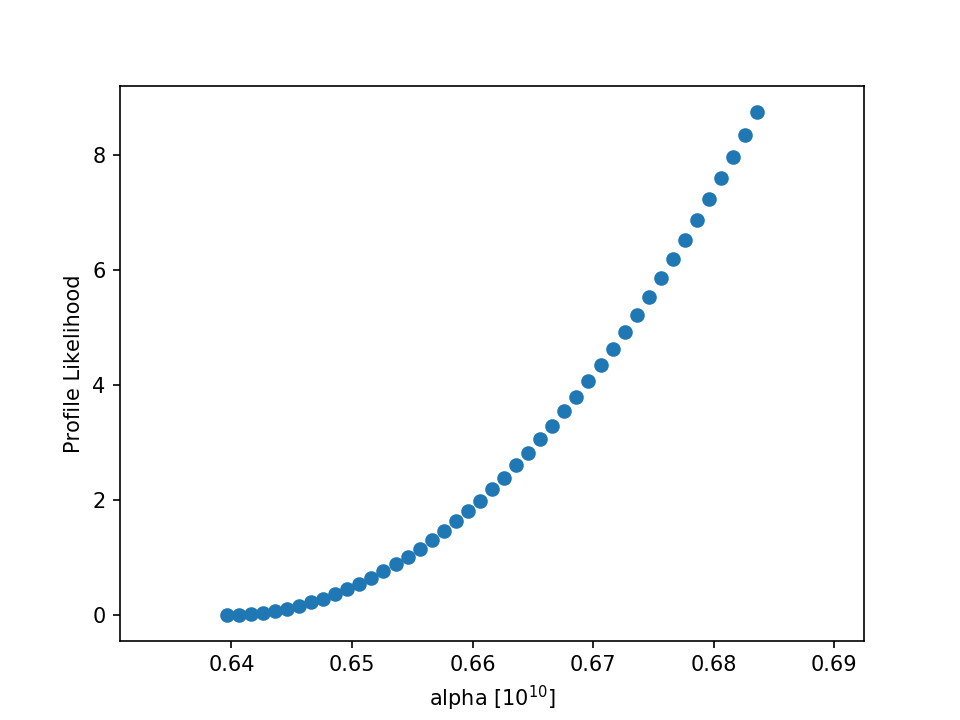

limit is:  0.6586578126393269


In [45]:
_,ax = plt.subplots()
ax.scatter(alpha,PL)
ax.set(xlabel='alpha [$10^{10}$]', ylabel='Profile Likelihood')
lim = np.interp(1.64, xp=PL, fp=alpha)
print('limit is: ', lim)

In [109]:
def get_lim(L):
    test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=L,yuk_or_grav="yuk",alpha=1e10)

    bandwidth = 1
    i=20
    drive_freq = 13*i
    fsamp = 5000
    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    responsefilt = np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10))

    X0 = responsefilt
    X=1.72e-16
    Sigma = 4e-18
    alpha_hat = X/X0
    bla = Sigma/X0*3
    alpha = np.arange(alpha_hat,alpha_hat+bla, 0.001)
    PL = ((alpha*X0*1.72-X)/Sigma)**2
    
    return np.interp(1.64, xp=PL, fp=alpha)

In [125]:
L = np.logspace(0.3, 3, 100)*1e-6
# get_lim(L=L[0])
limit = [get_lim(L=L_) for L_ in L]

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.15e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.33e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.33e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.00e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.08e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.17e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.26e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.33e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.51e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.71e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.93e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

<IPython.core.display.Javascript object>


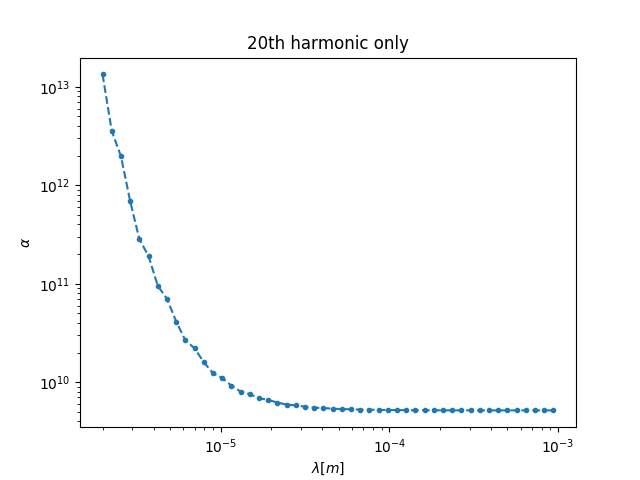

[Text(0, 0.5, '$\\alpha$'),
 Text(0.5, 0, '$\\lambda [m]$'),
 Text(0.5, 1.0, '20th harmonic only')]

In [126]:
_,ax = plt.subplots()
ax.loglog(L[::2],np.array(limit[::2])*1e10,'.--')
# ax.loglog(L[::2],np.array(limit2[::2])*1e10,'.--')
ax.set(xlabel='$\lambda [m]$', ylabel=r'$\alpha$', title='20th harmonic only')

### 4-harmonics-limit

In [49]:
test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=20e-6,yuk_or_grav="yuk",alpha=1e10)

bandwidth = 1
i=[4,5,6,20]
# i=[20]
drive_freq = [13*i_ for i_ in i]
fsamp = 5000
responsefilt = []
for drive_freq_ in drive_freq:
    b, a = signal.butter(3, [2.*(drive_freq_-bandwidth/2.)/fsamp, 2.*(drive_freq_+bandwidth/2.)/fsamp ], btype = 'bandpass')
    responsefilt.append(np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10)))

X0 = np.array(responsefilt)
X=np.array([9.8,8.99,3,1.72])*1e-16
Sigma = np.array([2,4,1.3,0.4])*1e-17
# X=np.array([1.72])*1e-16
# Sigma = np.array([0.4])*1e-17
# Sigma = 9.6e-17
alpha_hat = np.min(X/X0)
bla = np.min(Sigma/X0*3)
alpha = np.arange(0.7,0.8, 0.001)
PL = [sum(((alpha_*X0-X)/Sigma)**2) for alpha_ in alpha]

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


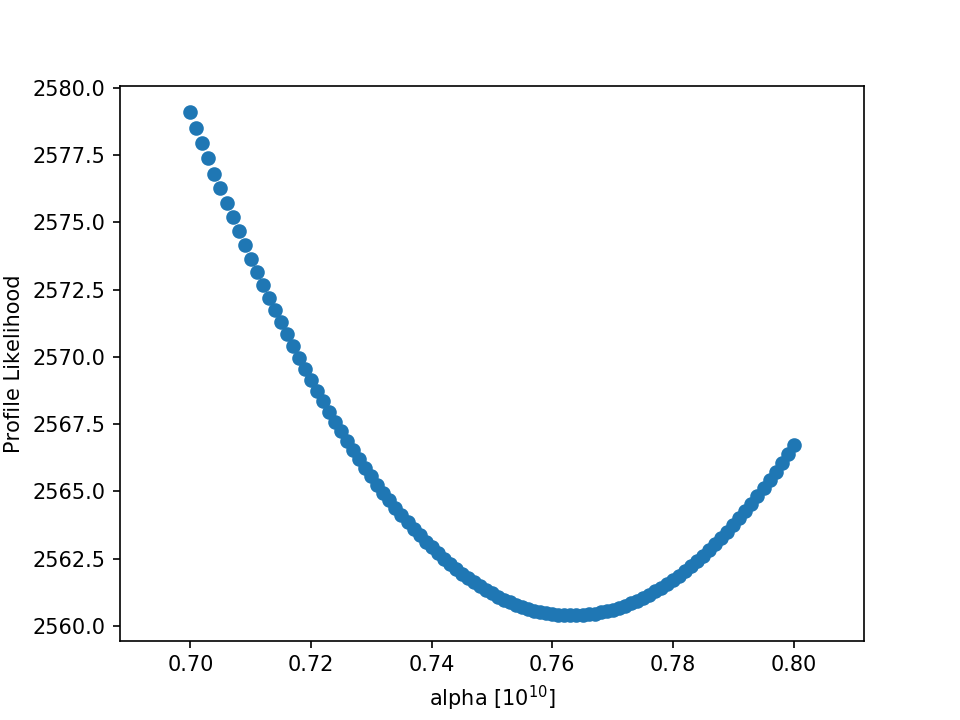

limit is:  0.7


In [50]:
_,ax = plt.subplots()
ax.scatter(alpha,PL)
ax.set(xlabel='alpha [$10^{10}$]', ylabel='Profile Likelihood')
lim = np.interp(1.64, xp=PL, fp=alpha)
print('limit is: ', lim)